In [ ]:
%matplotlib inline  
import matplotlib.pyplot as plt
from keras.layers import Bidirectional, Input, LSTM, Dense, Activation, Conv1D, Flatten, Embedding, MaxPooling1D, Dropout
#from keras.layers.embeddings import Embedding
from keras.preprocessing.sequence import pad_sequences
from keras import optimizers
from gensim.models import Word2Vec
from keras.models import Sequential, Model
import pandas as pd
import numpy as np
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from sklearn.utils import shuffle
import pickle
from sklearn.model_selection import train_test_split
from autocorrect import spell
import spacy
from spacy.gold import GoldParse
nlp = spacy.load('en')
import re
from sklearn.utils import shuffle
from collections import defaultdict
from collections import Counter
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud
from nltk.tokenize import sent_tokenize
from collections import defaultdict

In [44]:
df = pd.read_csv('train.csv')

In [45]:
pred_cols = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']

In [46]:
df['total_classes'] = df['toxic']+df['severe_toxic']+df['obscene']+df['threat']+df['insult']+df['identity_hate']

In [47]:
df['comment_text'] = df['comment_text'].apply(lambda x : x.replace("'", "").replace('"',''))

In [48]:
def correct_spelling(text):
    words = nlp(text)
    #print (words)
    words = [spell(w.text) for w in words]
    return " ".join(words)

In [50]:
#df['comment_text'] = df['comment_text'].apply(lambda x : correct_spelling(x))

In [51]:
df['comment_text'] = df['comment_text'].apply(lambda x: re.sub('[0-9]','',x))

In [ ]:
comment_list = df['comment_text'].tolist()

In [ ]:
count_words = comment_list

In [52]:
class_count = []
for col in pred_cols:
    class_count.append((col,len(df[df[col]==1])))
print (class_count)

[('toxic', 15294), ('severe_toxic', 1595), ('obscene', 8449), ('threat', 478), ('insult', 7877), ('identity_hate', 1405)]


In [53]:
df_all_toxic = df[np.logical_and(df['toxic'] ==1 , df['total_classes'] ==1)]
df_all_severe_toxic = df[np.logical_and(df['severe_toxic'] ==1 , df['total_classes'] <=6)]
df_all_obscene = df[np.logical_and(df['obscene'] ==1 , df['total_classes'] <=6)]
df_all_threat = df[np.logical_and(df['threat'] ==1 , df['total_classes'] <=6)]
df_all_insult = df[np.logical_and(df['insult'] ==1 , df['total_classes'] <=6)]
df_all_identity_hate = df[np.logical_and(df['identity_hate'] ==1 , df['total_classes'] <=6)]
df_all_rest =df[df['total_classes'] ==0]

In [54]:
print("Counts:- toxic:{0}, severe_toxic:{1}, obscene:{2}, threat:{3}, insult:{4}, identity_hate:{5}, rest:{6}".format(len(df_all_toxic),len(df_all_severe_toxic),len(df_all_obscene),len(df_all_threat),len(df_all_insult),len(df_all_identity_hate), len(df_all_rest)))

Counts:- toxic:5666, severe_toxic:1595, obscene:8449, threat:478, insult:7877, identity_hate:1405, rest:143346


In [55]:
toxic = defaultdict(int)
severe_toxic = defaultdict(int)
obscene = defaultdict(int)
threat = defaultdict(int)
insult = defaultdict(int)
identity_hate = defaultdict(int)
stop_words = set(stopwords.words('english'))
stop_words.add('\n\n')
stop_words.add(' ')
stop_words.add('i')
stop_words.add('...')
stop_words.add('\n')
stop_words.add('so')
stop_words.add('you')
stop_words.add('like')

In [56]:
data = [df_all_toxic,df_all_severe_toxic,df_all_obscene,df_all_threat,df_all_insult,df_all_identity_hate ]
dicts = [toxic, severe_toxic, obscene,threat,insult,identity_hate]
for i, data_sec in enumerate(data):
    commts = data_sec['comment_text'].tolist()
    for com in commts:
        words = nlp(com.lower())
        for w in words:
            if w.text.strip() not in string.punctuation and w.text.strip() not in stop_words:
                dicts[i][w.text.strip()] +=1


In [57]:
tx_wc = WordCloud()
tx_wc.fit_words(toxic)
sv_tx_wc = WordCloud()
sv_tx_wc.fit_words(severe_toxic)
obs_wc = WordCloud()
obs_wc.fit_words(obscene)
th_wc = WordCloud()
th_wc.fit_words(threat)
insult_wc = WordCloud()
insult_wc.fit_words(insult)
idh_wc = WordCloud()
idh_wc.fit_words(identity_hate)

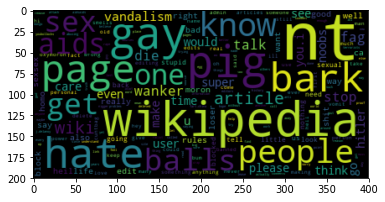

In [58]:
plt.imshow(tx_wc, interpolation='bilinear')

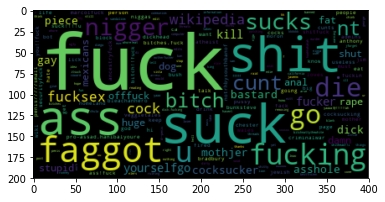

In [59]:
plt.imshow(sv_tx_wc, interpolation='bilinear')

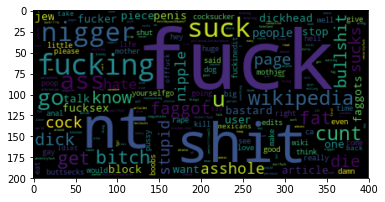

In [60]:
plt.imshow(obs_wc, interpolation='bilinear')

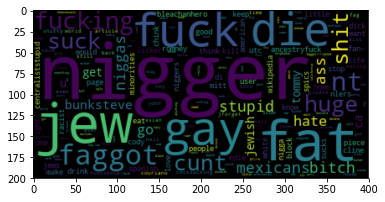

In [61]:
plt.imshow(idh_wc, interpolation='bilinear')

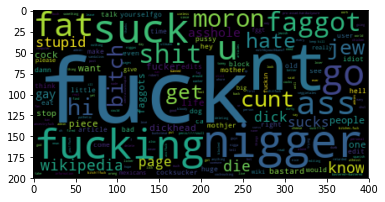

In [62]:
plt.imshow(insult_wc, interpolation='bilinear')

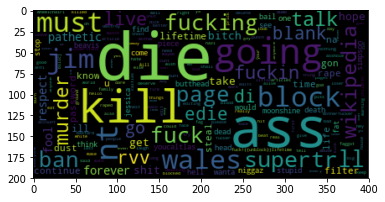

In [63]:
plt.imshow(th_wc, interpolation='bilinear')

In [36]:
df_all_obscene_pure = df[np.logical_and(df['obscene'] ==1 , df['total_classes'] <=1)]
df_all_threat_pure = df[np.logical_and(df['threat'] ==1 , df['total_classes'] <=1)]
df_all_insult_pure = df[np.logical_and(df['insult'] ==1 , df['total_classes'] <=1)]
df_all_identity_hate_pure = df[np.logical_and(df['identity_hate'] ==1 , df['total_classes'] <=1)]
obscene_pure = defaultdict(int)
threat_pure = defaultdict(int)
insult_pure = defaultdict(int)
identity_hate_pure = defaultdict(int)
data = [df_all_obscene_pure,df_all_threat_pure,df_all_insult_pure,df_all_identity_hate_pure ]
dicts = [ obscene_pure,threat_pure,insult_pure,identity_hate_pure]
for i, data_sec in enumerate(data):
    commts = data_sec['comment_text'].tolist()
    for com in commts:
        words = nlp(com.lower())
        for w in words:
            if w.text.strip() not in string.punctuation and w.text.strip() not in stop_words:
                dicts[i][w.text.strip()] +=1


In [37]:
obs_wc_p = WordCloud()
obs_wc_p.fit_words(obscene_pure)
th_wc_p = WordCloud()
th_wc_p.fit_words(threat_pure)
insult_wc_p = WordCloud()
insult_wc_p.fit_words(insult_pure)
idh_wc_p = WordCloud()
idh_wc_p.fit_words(identity_hate_pure)

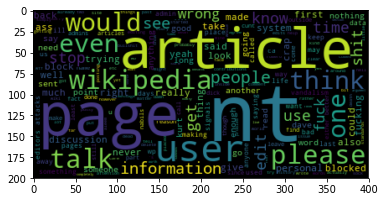

In [64]:
plt.imshow(obs_wc_p, interpolation='bilinear')

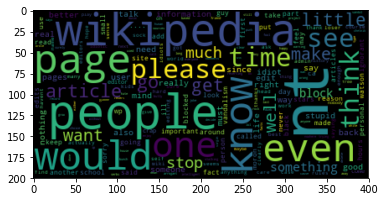

In [65]:
plt.imshow(insult_wc_p, interpolation='bilinear')

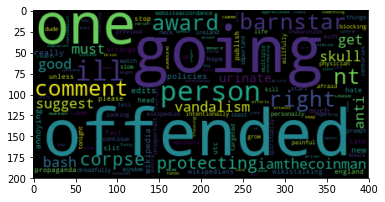

In [40]:
plt.imshow(th_wc_p, interpolation='bilinear')

In [16]:
def load_glove_embedding(glove_path):
    word2emb = {}
    with open(glove_path, "rb") as fglove:
        for line in fglove:
            cols = line.strip().split()
            word = cols[0]
            embedding = np.array(cols[1:], dtype="float32")
            word2emb[word] = embedding
    return word2emb

In [17]:
def generate_word2vec(comments):
    sents = [text_to_word_sequence(s) for s in comments]
    vector = Word2Vec(sents, size=100, iter=50, min_count=1)
    return vector

In [18]:
comment_list = df['comment_text'].tolist()
glove_file = 'glove.840B.300d.txt'
#glove_file = 'glove.6B.100d.txt'
emb_matrix = load_glove_embedding(glove_file)
#emb_matrix = generate_word2vec(comment_list)
max_len = 180
tokenizer = train_tokenizer(comment_list)
n_classes = 1

In [19]:
print ("The vocabulary size is: {0}".format(len(tokenizer.word_index)))
print (tokenizer.texts_to_sequences(["DFLSDKJFLS ADFSDF was Infosys CEO"]))

The vocabulary size is: 136351
[[24, 80719, 6595]]


In [20]:
def get_weight_matrix_glove(w2vec, tokenizer, emb_dim=100):
    matrix = np.zeros((len(tokenizer.word_index)+1,emb_dim))
    count = 0
    absent_words = []
    for key in tokenizer.word_index:
        if str.encode(key.replace("'", "").replace('"','')) in w2vec:
            matrix[tokenizer.word_index[key]] = w2vec[str.encode(key.replace("'", "").replace('"',''))]
        else:
            count+=1
            absent_words.append(key)
    print (count)
    #print (absent_words)
    return matrix

In [21]:
def get_weight_matrix_local(w2vec, tokenizer, emb_dim=100):
    matrix = np.zeros((len(tokenizer.word_index)+1,emb_dim))
    count = 0
    absent_words = []
    for key in tokenizer.word_index:
        if key.replace("'", "").replace('"','') in w2vec:
            matrix[tokenizer.word_index[key]] = w2vec[key.replace("'", "").replace('"','')]
        else:
            count+=1
            absent_words.append(key)
    print (count)
    #print (absent_words)
    return matrix

In [22]:
"""
This returns CNN based model. There are 6 output classes, all sharing the parameters of a common network.
"""
def get_model(emb_matrix, learning_rate=0.001):
    input = Input(shape=(maxlen,), dtype='int32')
    embedding = Embedding( input_dim=emb_matrix.shape[0], output_dim=emb_matrix.shape[1], weights=[emb_matrix],input_length=maxlen,trainable=True)

    sequence_input = embedding(input)
    x = Conv1D(64, 3, activation='relu')(sequence_input)
    x = MaxPooling1D(2)(x)
    x = Conv1D(128, 3, activation='relu')(x)
    x = MaxPooling1D(2)(x)
    x = Conv1D(256, 3, activation='relu')(x)
    x = MaxPooling1D(2)(x)

    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.1)(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.1)(x)
    x = Dense(64, activation='relu')(x)

    #toxic	severe_toxic	obscene	threat	insult	identity_hate
    preds_toxic = Dense(n_classes, activation='sigmoid')(x)
    preds_servere_toxic = Dense(n_classes, activation='sigmoid')(x)
    preds_obscene = Dense(n_classes, activation='sigmoid')(x)
    preds_threat = Dense(n_classes, activation='sigmoid')(x)
    preds_insult = Dense(n_classes, activation='sigmoid')(x)
    preds_identity_hate = Dense(n_classes, activation='sigmoid')(x)
    
    model = Model(input,[preds_toxic, preds_servere_toxic, preds_obscene, preds_threat, preds_insult, preds_identity_hate])
    #model.add(Activation('softmax'))
    sgd = optimizers.SGD(lr=learning_rate, clipvalue=0.5)
    model.compile(loss='mse', optimizer=sgd,metrics=['accuracy'])

    print (model.summary())

    return model

In [23]:
"""
This returns LSTM based model. There are 6 output classes, all soft sharing the parameters of a common network.
"""
def get_model_soft_sharing_lstm(emb_matrix, learning_rate=0.001):
    input = Input(shape=(maxlen,), dtype='int32')
    embedding = Embedding( input_dim=emb_matrix.shape[0], output_dim=emb_matrix.shape[1], weights=[emb_matrix],input_length=maxlen,trainable=True)

    sequence_input = embedding(input)
    x = Bidirectional(LSTM(128,return_sequences=True))(sequence_input)
    x = Bidirectional(LSTM(128,return_sequences=False))(x)

    x = Dense(256, activation='relu')(x)
    x = Dropout(0.1)(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.1)(x)
    x1 = Dense(64, activation='relu')(x)
    x2 = Dense(64, activation='relu')(x)
    x3 = Dense(64, activation='relu')(x)
    x4 = Dense(64, activation='relu')(x)
    x5 = Dense(64, activation='relu')(x)
    x6 = Dense(64, activation='relu')(x)

    #toxic	severe_toxic	obscene	threat	insult	identity_hate
    preds_toxic = Dense(n_classes, activation='sigmoid')(x1)
    preds_servere_toxic = Dense(n_classes, activation='sigmoid')(x2)
    preds_obscene = Dense(n_classes, activation='sigmoid')(x3)
    preds_threat = Dense(n_classes, activation='sigmoid')(x4)
    preds_insult = Dense(n_classes, activation='sigmoid')(x5)
    preds_identity_hate = Dense(n_classes, activation='sigmoid')(x6)
    
    model = Model(input,[preds_toxic, preds_servere_toxic, preds_obscene, preds_threat, preds_insult, preds_identity_hate])
    #model.add(Activation('softmax'))
    adam = optimizers.Adam(lr=learning_rate)
    model.compile(loss='mse', optimizer=adam,metrics=['accuracy'])

    print (model.summary())

    return model

In [226]:
XTrain = tokenizer.texts_to_sequences(comment_list[0:80000])
YTrain_toxic = np.array(df['toxic'].tolist()[0:80000])
YTrain_severe_toxic = np.array(df['severe_toxic'].tolist()[0:80000])
YTrain_obscene = np.array(df['obscene'].tolist()[0:80000])
YTrain_threat = np.array(df['threat'].tolist()[0:80000])
YTrain_insult = np.array(df['insult'].tolist()[0:80000])
YTrain_identity_hate = np.array(df['identity_hate'].tolist()[0:80000])
YTrain = [YTrain_toxic, YTrain_severe_toxic, YTrain_obscene, YTrain_threat, YTrain_insult, YTrain_identity_hate]


array([1, 0, 0, ..., 0, 0, 0])

#### Use the X_train_* to create XTrains and YTrains.

In [27]:
X_train = shuffle(X_train)
XTrain = tokenizer.texts_to_sequences(X_train.astype(str)['comment_text'].tolist())
YTrain_toxic = np.array(X_train['toxic'].tolist())
YTrain_severe_toxic = np.array(X_train['severe_toxic'].tolist())
YTrain_obscene = np.array(X_train['obscene'].tolist())
YTrain_threat = np.array(X_train['threat'].tolist())
YTrain_insult = np.array(X_train['insult'].tolist())
YTrain_identity_hate = np.array(X_train['identity_hate'].tolist())
YTrain = [YTrain_toxic, YTrain_severe_toxic, YTrain_obscene, YTrain_threat, YTrain_insult, YTrain_identity_hate]


In [28]:
maxlen = 100
#final_emb_matrix = get_weight_matrix_local(emb_matrix, tokenizer, 100)
final_emb_matrix = get_weight_matrix_glove(emb_matrix, tokenizer, 300)
#model = get_model(final_emb_matrix, learning_rate=0.001)
model = get_model_soft_sharing_lstm(final_emb_matrix, learning_rate=0.001)

54301
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 100)           0                                            
____________________________________________________________________________________________________
embedding_1 (Embedding)          (None, 100, 300)      40905600    input_1[0][0]                    
____________________________________________________________________________________________________
bidirectional_1 (Bidirectional)  (None, 100, 256)      439296      embedding_1[0][0]                
____________________________________________________________________________________________________
bidirectional_2 (Bidirectional)  (None, 256)           394240      bidirectional_1[0][0]            
_____________________________________________________________________________________

In [ ]:
model.fit(pad_sequences(XTrain, maxlen),YTrain ,batch_size=256, epochs=10, verbose=1)

Epoch 1/10
317454/317454 [==============================] - 5478s - loss: 0.1294 - dense_9_loss: 0.0145 - dense_10_loss: 0.0293 - dense_11_loss: 0.0213 - dense_12_loss: 0.0097 - dense_13_loss: 0.0323 - dense_14_loss: 0.0223 - dense_9_acc: 0.9833 - dense_10_acc: 0.9638 - dense_11_acc: 0.9733 - dense_12_acc: 0.9884 - dense_13_acc: 0.9613 - dense_14_acc: 0.9723  
Epoch 2/10
317454/317454 [==============================] - 32704s - loss: 0.0411 - dense_9_loss: 0.0064 - dense_10_loss: 0.0082 - dense_11_loss: 0.0066 - dense_12_loss: 0.0029 - dense_13_loss: 0.0113 - dense_14_loss: 0.0058 - dense_9_acc: 0.9929 - dense_10_acc: 0.9912 - dense_11_acc: 0.9928 - dense_12_acc: 0.9970 - dense_13_acc: 0.9879 - dense_14_acc: 0.9939 
Epoch 3/10
317454/317454 [==============================] - 9712s - loss: 0.0297 - dense_9_loss: 0.0039 - dense_10_loss: 0.0060 - dense_11_loss: 0.0050 - dense_12_loss: 0.0019 - dense_13_loss: 0.0080 - dense_14_loss: 0.0051 - dense_9_acc: 0.9958 - dense_10_acc: 0.9935 - den

In [242]:
XVal = tokenizer.texts_to_sequences(comment_list[80000:])
YVal_toxic = np.array(df['toxic'].tolist()[80000:])
YVal_severe_toxic = np.array(df['severe_toxic'].tolist()[80000:])
YVal_obscene = np.array(df['obscene'].tolist()[80000:])
YVal_threat = np.array(df['threat'].tolist()[80000:])
YVal_insult = np.array(df['insult'].tolist()[80000:])
YVal_identity_hate = np.array(df['identity_hate'].tolist()[80000:])
YVal = [YVal_toxic, YVal_severe_toxic, YVal_obscene, YVal_threat, YVal_insult, YVal_identity_hate]
acc = model.evaluate(pad_sequences(XVal, maxlen), YVal, batch_size=128)
#print("\nTest score: %.3f, accuracy: %.3f" % (v_score, v_acc))
print (acc)


15744/15851 [============================>.] - ETA: 0s[1.3306307687374945, 0.76559835024477441, 0.037324370273573, 0.22419010483292057, 0.0089581822435044374, 0.26861323423095623, 0.025946509180003314, 0.16434294370234362, 0.99009526212857235, 0.58084663434191375, 0.99671944987697936, 0.44975080429232916, 0.99160936218535112]


In [61]:
XVal = tokenizer.texts_to_sequences(X_test.astype(str)['comment_text'].tolist())
#print(XTrain[0:10],(X_test.astype(str)['comment_text'][0:10]))
YVal_toxic = np.array(X_test['toxic'].tolist())
YVal_severe_toxic = np.array(X_test['severe_toxic'].tolist())
YVal_obscene = np.array(X_test['obscene'].tolist())
YVal_threat = np.array(X_test['threat'].tolist())
YVal_insult = np.array(X_test['insult'].tolist())
YVal_identity_hate = np.array(X_test['identity_hate'].tolist())
YVal = [YVal_toxic, YVal_severe_toxic, YVal_obscene, YVal_threat, YVal_insult, YVal_identity_hate]
acc = model.evaluate(pad_sequences(XVal, maxlen), YVal, batch_size=128)
#print("\nTest score: %.3f, accuracy: %.3f" % (v_score, v_acc))
print (acc)


71313/71313 [==============================] - 277s   
[0.01865302498291024, 0.0022265418285637938, 0.0020964343363799533, 0.0049406068940923116, 0.00053131799813346218, 0.0072291381374512817, 0.0016289858573351028, 0.99768625636279495, 0.99778441518376737, 0.99469942366749398, 0.99943909245158669, 0.99227349852060631, 0.99827520928862901]


In [42]:
test_df = pd.read_csv('test.csv')
#test_comments = test_df['comment_text'].astype(str).tolist()
#XTest = tokenizer.texts_to_sequences(test_comments)
#print (test_df.columns)
test_df.count()

id              226998
comment_text    226997
dtype: int64

In [63]:
predictions = model.predict(pad_sequences(XTest, maxlen))

In [65]:
predicted_df = pd.DataFrame(columns=['id','toxic','severe_toxic','obscene','threat','insult','identity_hate'])
predicted_df['id'] = test_df['id']
for i, k in enumerate(pred_cols):
    predicted_df[k] = predictions[i]
predicted_df.head()


,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,6044863,1.000000e+00,7.511207e-05,9.999720e-01,6.594608e-17,9.999925e-01,1.632008e-07
1,6102620,4.451817e-04,1.394249e-11,9.999999e-01,4.865805e-25,3.940427e-02,1.487692e-08
2,14563293,5.456354e-08,1.224665e-11,9.990605e-01,2.329552e-16,2.548902e-04,8.439587e-10
3,21086297,1.000000e+00,3.441579e-13,1.052506e-06,1.114422e-26,6.190220e-09,2.601758e-09
4,22982444,1.000000e+00,6.223081e-13,1.503691e-07,4.526798e-20,2.873844e-07,1.643568e-08


In [66]:
predicted_df.to_csv('first_submission.csv',index=False, header=True)